In [ ]:
!pip install --pre pycaret

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Impor Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
# from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
# from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier

#Load The dataset

In [ ]:
!pip install openpyxl

In [ ]:
import xlrd

In [ ]:
import pandas as pd
df = pd.read_excel("/content/dataset_02052023.xlsx" )
df.head()

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


In [ ]:
df['Timestamp'].head()

0    2022-10-26T08:17:21.847Z
1    2022-10-26T08:17:22.852Z
2    2022-10-26T08:17:23.857Z
3    2022-10-26T08:17:24.863Z
4    2022-10-26T08:17:25.877Z
Name: Timestamp, dtype: object

#Remove leading and trailing quotes from the 'Timestamp' column

In [ ]:
df['Timestamp'] = df['Timestamp'].str.strip('"')

In [ ]:
df['Timestamp']

0       2022-10-26T08:17:21.847Z
1       2022-10-26T08:17:22.852Z
2       2022-10-26T08:17:23.857Z
3       2022-10-26T08:17:24.863Z
4       2022-10-26T08:17:25.877Z
                  ...           
7404    2022-10-26T15:36:02.555Z
7405    2022-10-26T15:36:03.562Z
7406    2022-10-26T15:36:04.571Z
7407    2022-10-26T15:36:05.572Z
7408    2022-10-26T15:36:06.580Z
Name: Timestamp, Length: 7409, dtype: object

In [ ]:
# Convert the timestamp column to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%Y-%m-%dT%H:%M:%S.%fZ")

In [ ]:
df['Timestamp']

0      2022-10-26 08:17:21.847
1      2022-10-26 08:17:22.852
2      2022-10-26 08:17:23.857
3      2022-10-26 08:17:24.863
4      2022-10-26 08:17:25.877
                 ...          
7404   2022-10-26 15:36:02.555
7405   2022-10-26 15:36:03.562
7406   2022-10-26 15:36:04.571
7407   2022-10-26 15:36:05.572
7408   2022-10-26 15:36:06.580
Name: Timestamp, Length: 7409, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Num                   7409 non-null   int64         
 1   Timestamp             7409 non-null   datetime64[ns]
 2   Current_J0            7363 non-null   float64       
 3   Temperature_T0        7355 non-null   float64       
 4   Current_J1            7355 non-null   float64       
 5   Temperature_J1        7355 non-null   float64       
 6   Current_J2            7355 non-null   float64       
 7   Temperature_J2        7355 non-null   float64       
 8   Current_J3            7355 non-null   float64       
 9   Temperature_J3        7355 non-null   float64       
 10  Current_J4            7355 non-null   float64       
 11  Temperature_J4        7355 non-null   float64       
 12  Current_J5            7355 non-null   float64       
 13  Temperature_J5    

In [ ]:
df.isnull().sum()

Num                      0
Timestamp                0
Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64

In [ ]:
df=df.fillna(method='ffill')
df.isnull().sum()

Num                     0
Timestamp               0
Current_J0              0
Temperature_T0          0
Current_J1              0
Temperature_J1          0
Current_J2              0
Temperature_J2          0
Current_J3              0
Temperature_J3          0
Current_J4              0
Temperature_J4          0
Current_J5              0
Temperature_J5          0
Speed_J0                0
Speed_J1                0
Speed_J2                0
Speed_J3                0
Speed_J4                0
Speed_J5                0
Tool_current            0
cycle                   0
Robot_ProtectiveStop    0
grip_lost               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Num                   7409 non-null   int64         
 1   Timestamp             7409 non-null   datetime64[ns]
 2   Current_J0            7409 non-null   float64       
 3   Temperature_T0        7409 non-null   float64       
 4   Current_J1            7409 non-null   float64       
 5   Temperature_J1        7409 non-null   float64       
 6   Current_J2            7409 non-null   float64       
 7   Temperature_J2        7409 non-null   float64       
 8   Current_J3            7409 non-null   float64       
 9   Temperature_J3        7409 non-null   float64       
 10  Current_J4            7409 non-null   float64       
 11  Temperature_J4        7409 non-null   float64       
 12  Current_J5            7409 non-null   float64       
 13  Temperature_J5    

In [ ]:
print(df.columns)

Index(['Num', 'Timestamp', 'Current_J0', 'Temperature_T0', 'Current_J1',
       'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3',
       'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5',
       'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3',
       'Speed_J4', 'Speed_J5', 'Tool_current', 'cycle ',
       'Robot_ProtectiveStop', 'grip_lost'],
      dtype='object')


In [ ]:
df.set_index('Timestamp', inplace=True)

In [ ]:
print(df.columns)

Index(['Num', 'Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1',
       'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3',
       'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5',
       'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5',
       'Tool_current', 'cycle ', 'Robot_ProtectiveStop', 'grip_lost'],
      dtype='object')


In [ ]:
df.head()

,Num,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-10-26 08:17:21.847,1,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,-0.062540,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
2022-10-26 08:17:22.852,2,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-1.062762,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2022-10-26 08:17:23.857,3,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,-0.668869,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
2022-10-26 08:17:24.863,4,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-0.819755,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
2022-10-26 08:17:25.877,5,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,-0.966427,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


In [ ]:
df.tail()

,Num,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-10-26 15:36:02.555,7405,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.375,-0.019447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080013,264,0.0,False
2022-10-26 15:36:03.562,7406,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.375,-0.009186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.078740,264,0.0,False
2022-10-26 15:36:04.571,7407,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.375,-0.002978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.091471,264,0.0,False
2022-10-26 15:36:05.572,7408,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.375,-0.001136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090026,264,0.0,False
2022-10-26 15:36:06.580,7409,-0.134429,37.1250,-2.244449,40.3125,-1.098950,40.6875,-0.502397,43.375,-0.025829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.089097,264,0.0,False


#Temperature Values Over Time

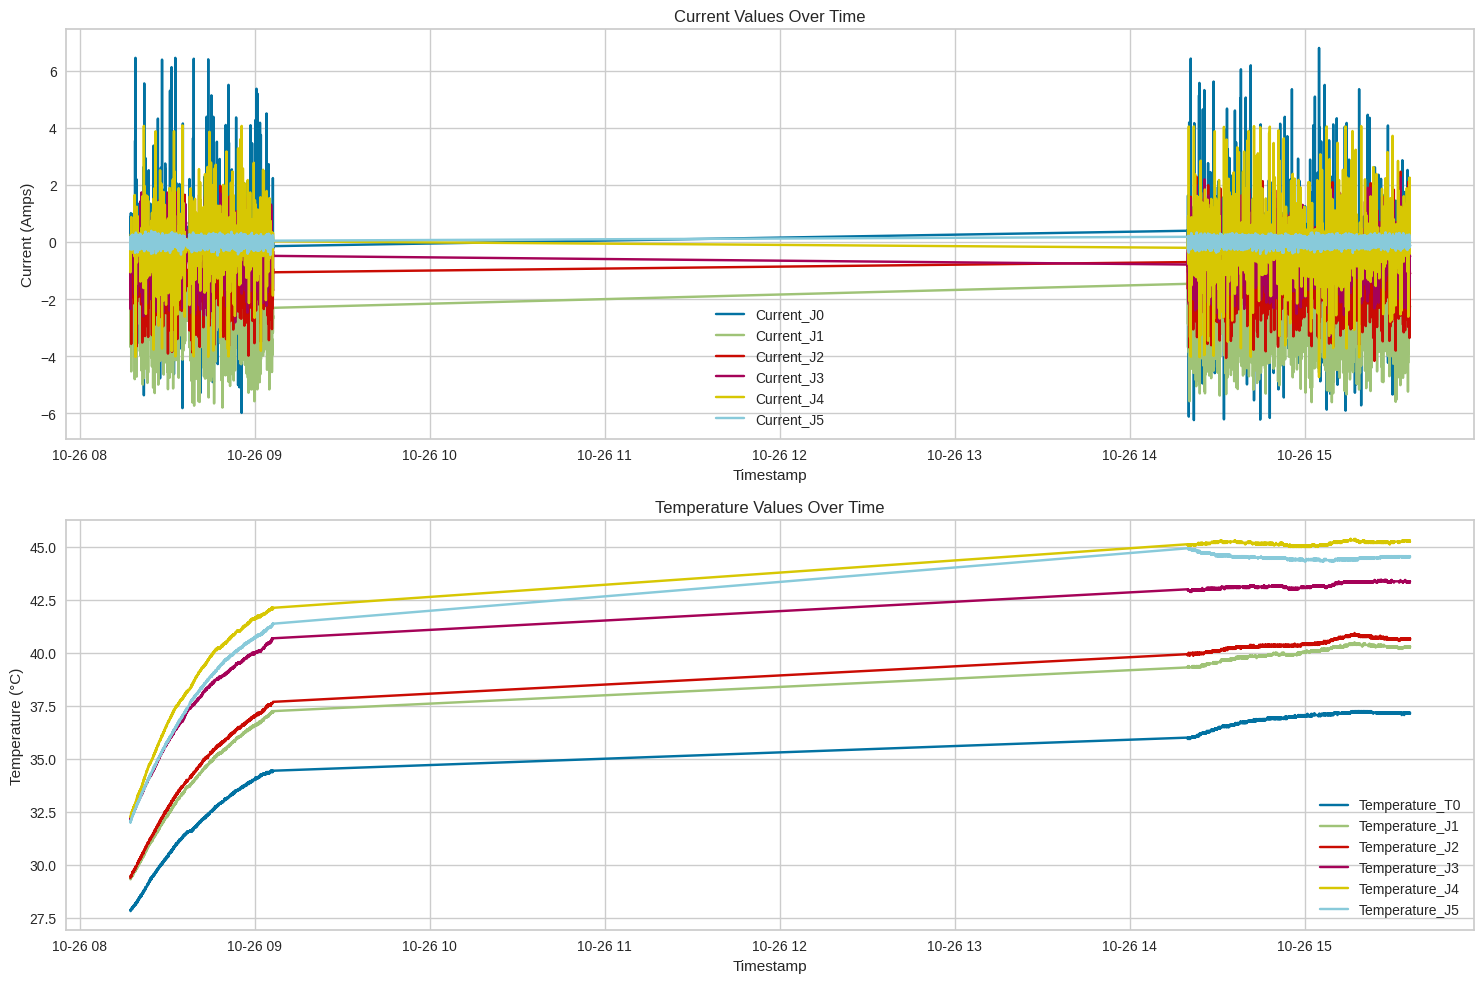

In [ ]:
import matplotlib.pyplot as plt

# Select the columns for plotting
current_columns = ['Current_J0', 'Current_J1', 'Current_J2', 'Current_J3', 'Current_J4', 'Current_J5']
temperature_columns = ['Temperature_T0', 'Temperature_J1', 'Temperature_J2', 'Temperature_J3', 'Temperature_J4', 'Temperature_J5']

# Create subplots for current and temperature
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot current values
for column in current_columns:
  axes[0].plot(df.index, df[column], label=column)

axes[0].set_title('Current Values Over Time')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Current (Amps)')
axes[0].legend()

# Plot temperature values
for column in temperature_columns:
  axes[1].plot(df.index, df[column], label=column)

axes[1].set_title('Temperature Values Over Time')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Temperature (°C)')
axes[1].legend()

plt.tight_layout()
plt.show()


#scatter plots for each combination of speed and current

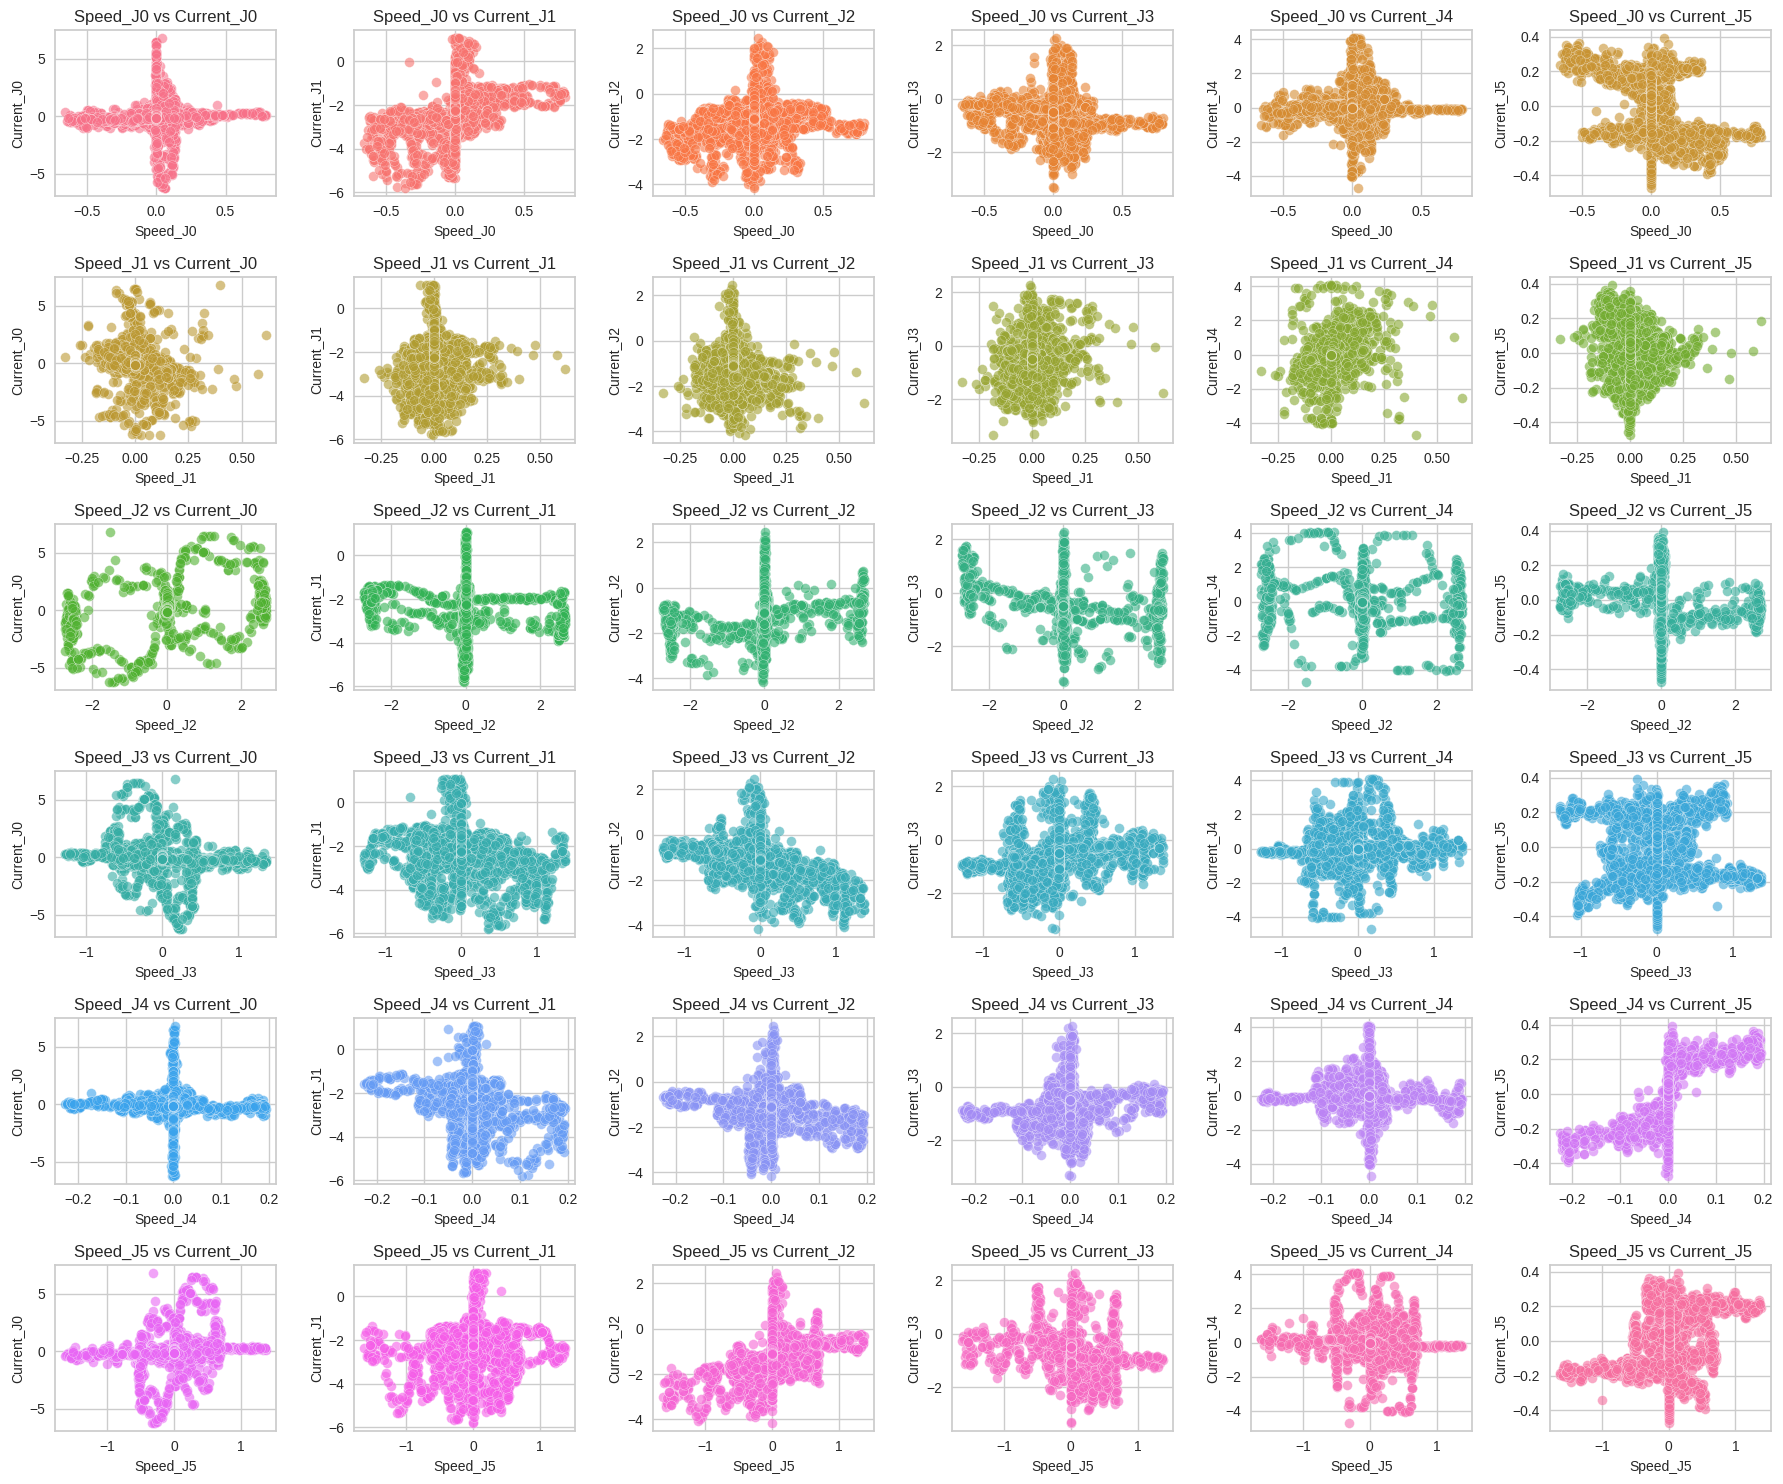

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns for plotting
speed_columns = ['Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5']
current_columns = ['Current_J0', 'Current_J1', 'Current_J2', 'Current_J3', 'Current_J4', 'Current_J5']

# Create subplots for each joint
fig, axes = plt.subplots(len(speed_columns), len(current_columns), figsize=(18, 15))

# Use a color palette
colors = sns.color_palette("husl", len(speed_columns) * len(current_columns))

# Plot scatter plots for each combination of speed and current
for i, speed_col in enumerate(speed_columns):
    for j, current_col in enumerate(current_columns):
        axes[i, j].scatter(df[speed_col], df[current_col], alpha=0.6, color=colors[i * len(current_columns) + j], edgecolors='w', s=50)
        axes[i, j].set_xlabel(speed_col, fontsize=10)
        axes[i, j].set_ylabel(current_col, fontsize=10)
        axes[i, j].set_title(f'{speed_col} vs {current_col}', fontsize=12)

plt.tight_layout()
plt.show()


 # Histograms for each temperature column


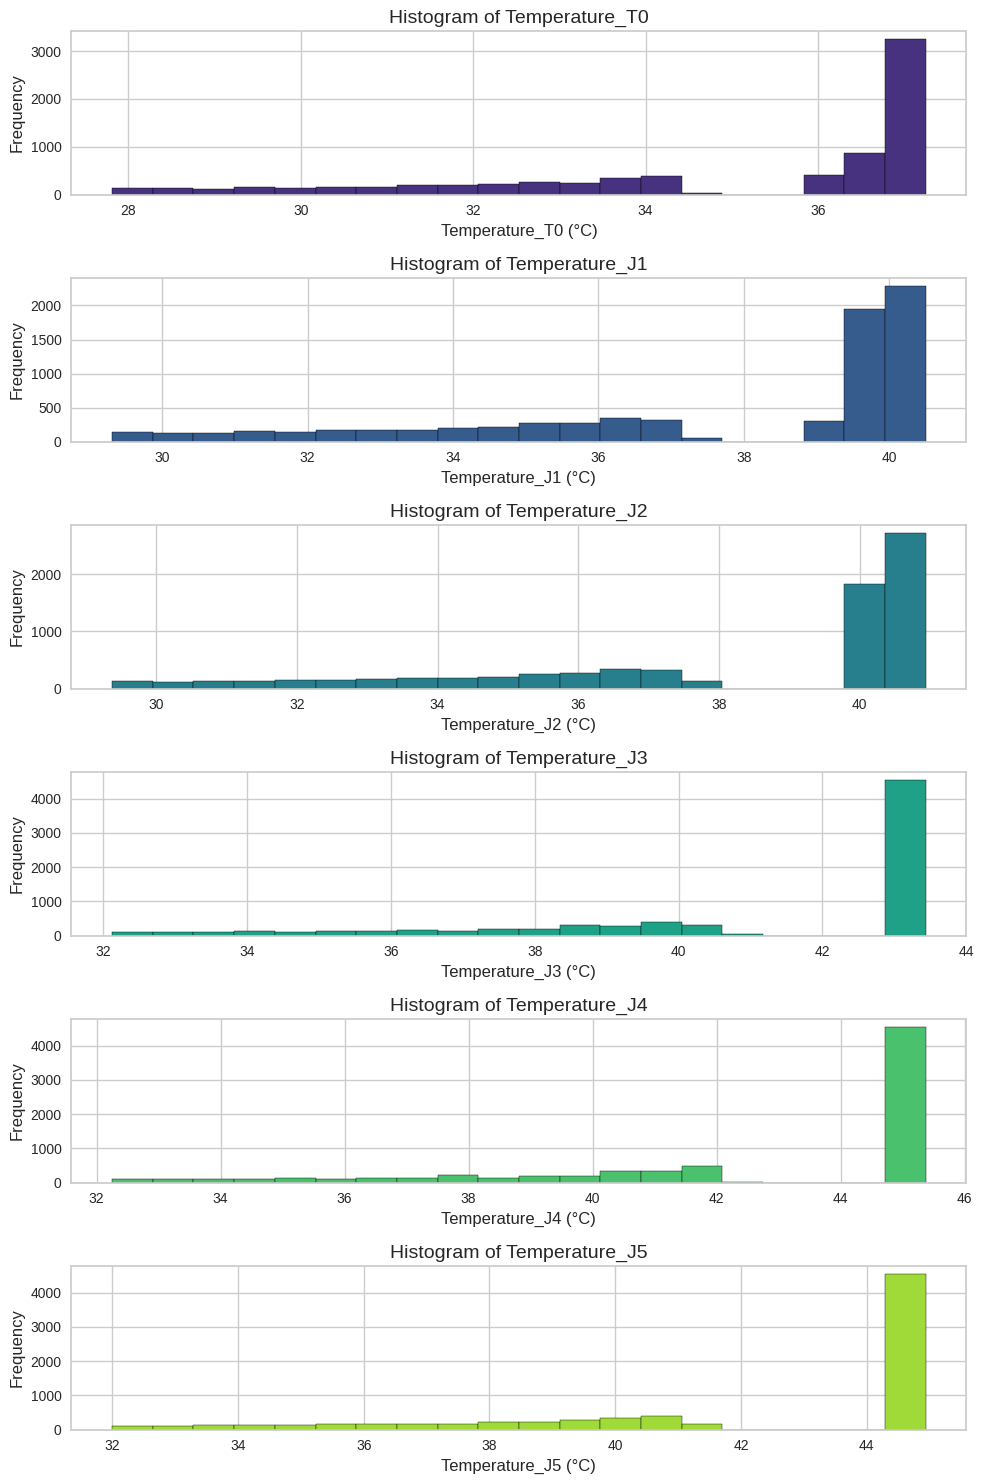

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the temperature columns
temperature_columns = ['Temperature_T0', 'Temperature_J1', 'Temperature_J2', 'Temperature_J3', 'Temperature_J4', 'Temperature_J5']

# Create subplots for each temperature column
fig, axes = plt.subplots(len(temperature_columns), 1, figsize=(10, 15))

# Choose a color palette
colors = sns.color_palette("viridis", len(temperature_columns))

# Plot histograms for each temperature column
for i, column in enumerate(temperature_columns):
    axes[i].hist(df[column], bins=20, edgecolor='black', color=colors[i])
    axes[i].set_title(f'Histogram of {column}', fontsize=14)
    axes[i].set_xlabel(f'{column} (°C)', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


# Speed Values Over Time

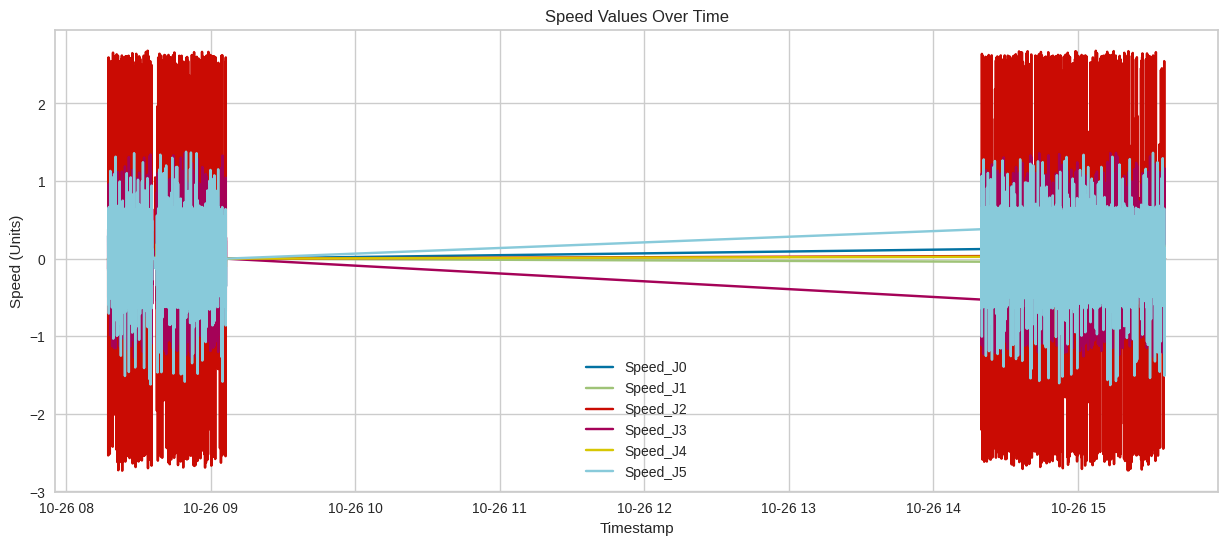

In [ ]:
import matplotlib.pyplot as plt

# Select the speed columns
speed_columns = ['Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5']

# Create a figure and axes
plt.figure(figsize=(15, 6))

# Plot each speed column as a line
for column in speed_columns:
  plt.plot(df.index, df[column], label=column)

# Set the title and labels
plt.title('Speed Values Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Speed (Units)')

# Add a legend
plt.legend()

# Display the plot
plt.show()


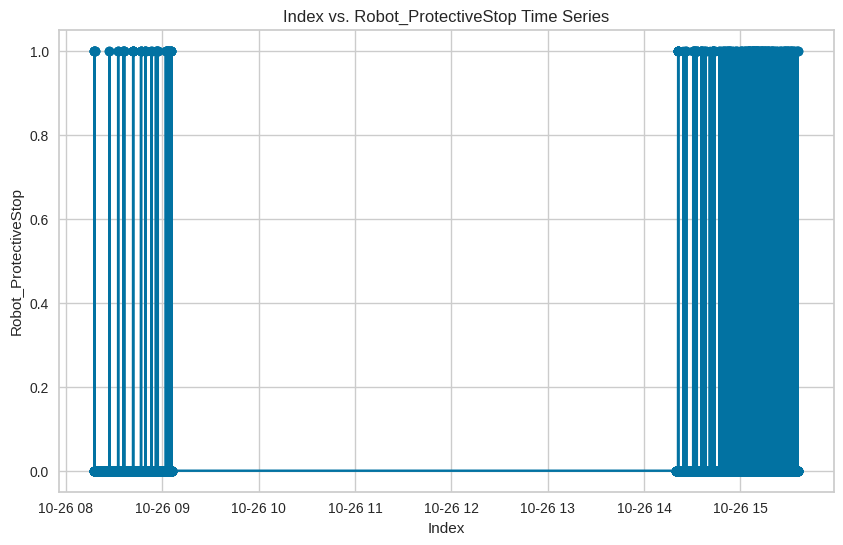

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

robot_protective_stop = df['Robot_ProtectiveStop']

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, robot_protective_stop, marker='o', linestyle='-', color='b')
plt.xlabel('Index')
plt.ylabel('Robot_ProtectiveStop')
plt.title('Index vs. Robot_ProtectiveStop Time Series')
plt.grid(True)
plt.show()


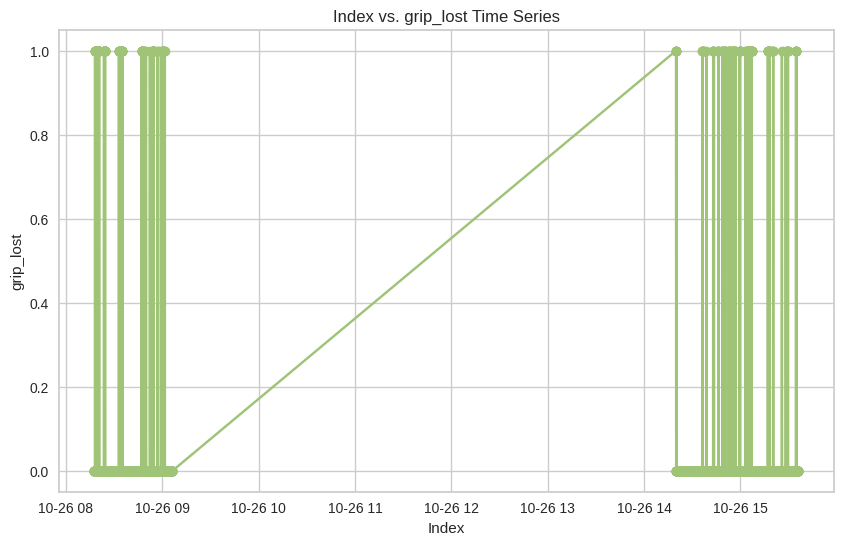

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

robot_protective_stop = df['grip_lost']

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, robot_protective_stop, marker='o' , linestyle='-', color='g')
plt.xlabel('Index')
plt.ylabel('grip_lost')
plt.title('Index vs. grip_lost Time Series')
plt.grid(True)
plt.show()


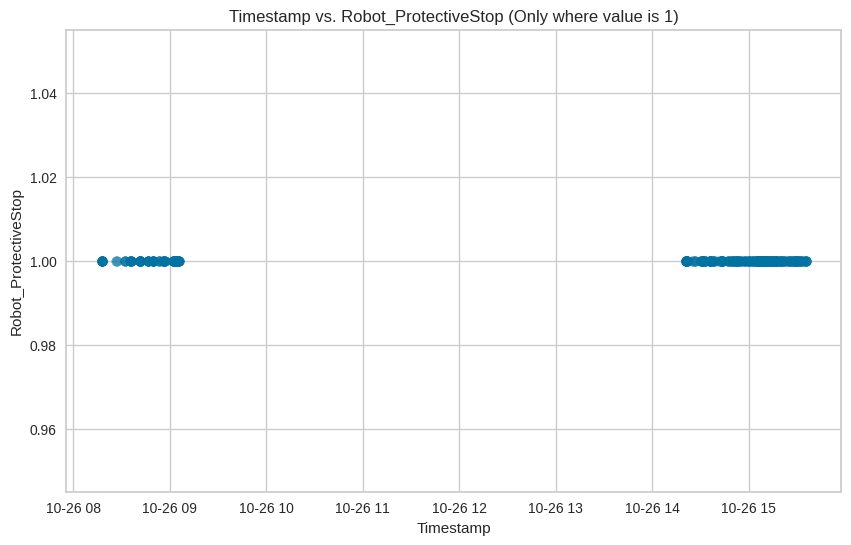

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data where 'Robot_ProtectiveStop' is 1
filtered_data = df[df['Robot_ProtectiveStop'] == 1]

# Plotting the scatter plot for the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data.index, filtered_data['Robot_ProtectiveStop'], color='b', alpha=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Robot_ProtectiveStop')
plt.title('Timestamp vs. Robot_ProtectiveStop (Only where value is 1)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from pycaret.classification import setup, compare_models
# Initialize PyCaret Classification Experiment
exp = setup(df, target='Robot_ProtectiveStop', session_id=123)

# Compare models to find the best one
best_model = compare_models()

# Optionally, you can print the setup summary
print(exp)

,Description,Value
0,Session id,123
1,Target,Robot_ProtectiveStop
2,Target type,Binary
3,Original data shape,"(7409, 23)"
4,Transformed data shape,"(7409, 23)"
5,Transformed train set shape,"(5186, 23)"
6,Transformed test set shape,"(2223, 23)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9744,0.9717,0.5068,0.7357,0.5910,0.5785,0.5936,0.2560
lightgbm,Light Gradient Boosting Machine,0.9740,0.9762,0.4921,0.7309,0.5819,0.5692,0.5841,2.5020
et,Extra Trees Classifier,0.9701,0.9774,0.3279,0.7205,0.4454,0.4327,0.4705,0.6980
rf,Random Forest Classifier,0.9688,0.9783,0.2968,0.7067,0.4140,0.4009,0.4430,1.6470
ada,Ada Boost Classifier,0.9678,0.9473,0.3837,0.6102,0.4652,0.4499,0.4654,0.9010
gbc,Gradient Boosting Classifier,0.9676,0.9658,0.3026,0.6580,0.4035,0.3897,0.4260,2.8800
knn,K Neighbors Classifier,0.9663,0.8807,0.2732,0.6107,0.3689,0.3548,0.3891,0.2730
lr,Logistic Regression,0.9624,0.7025,0.0000,0.0000,0.0000,0.0000,0.0000,2.5960
svm,SVM - Linear Kernel,0.9624,0.4552,0.0000,0.0000,0.0000,0.0000,0.0000,0.1510
ridge,Ridge Classifier,0.9624,0.7304,0.0000,0.0000,0.0000,0.0000,0.0000,0.1040


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# 'df' is our DataFrame and 'Robot_ProtectiveStop' is the target column
X = df.drop('Robot_ProtectiveStop', axis=1)  # Features
y = df['Robot_ProtectiveStop']  # Target variable

# Split the data into training and testing sets ( 80% train, 20% test)

In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#XGboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Apply XGboost")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)


Apply XGboost
Accuracy: 0.9743589743589743
Recall: 0.5192307692307693
F1 Score: 0.5869565217391305
Precision: 0.675


#LightGBM

In [ ]:
!pip install lightgbm
import lightgbm as lgb


# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for LightGBM
param = {
    'objective': 'binary',  # Assuming binary classification
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
num_round = 100  # Number of boosting rounds
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test data
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

# Print the results
print("Apply LightGBM")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 227, number of negative: 5700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4714
[LightGBM] [Info] Number of data points in the train set: 5927, number of used features: 22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038299 -> initscore=-3.223271
[LightGBM] [Info] Start training from score -3.223271
Apply LightGBM
Accuracy: 0.975033738191633
Recall: 0.46153846153846156
F1 Score: 0.5647058823529412
Precision: 0.7272727272727273


#Extra Trees Classifier

In [ ]:
# Create an Extra Trees Classifier model
et_model = ExtraTreesClassifier(random_state=42)

# Fit the model to the training data
et_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = et_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Extra Trees Classifier")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)


Extra Trees Classifier
Accuracy: 0.970310391363023
Recall: 0.28846153846153844
F1 Score: 0.40540540540540543
Precision: 0.6818181818181818


#Random Forest Classifier

In [ ]:

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Random Forest Classifier")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)


Random Forest Classifier
Accuracy: 0.9743589743589743
Recall: 0.3269230769230769
F1 Score: 0.4722222222222222
Precision: 0.85


#AdaBoost Classifier

In [ ]:
# Create an AdaBoost Classifier model
ab_model = AdaBoostClassifier(random_state=42)

# Fit the model to the training data
ab_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ab_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("AdaBoost Classifier")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)


AdaBoost Classifier
Accuracy: 0.9682860998650472
Recall: 0.38461538461538464
F1 Score: 0.45977011494252873
Precision: 0.5714285714285714


#Single Modle Evaluation

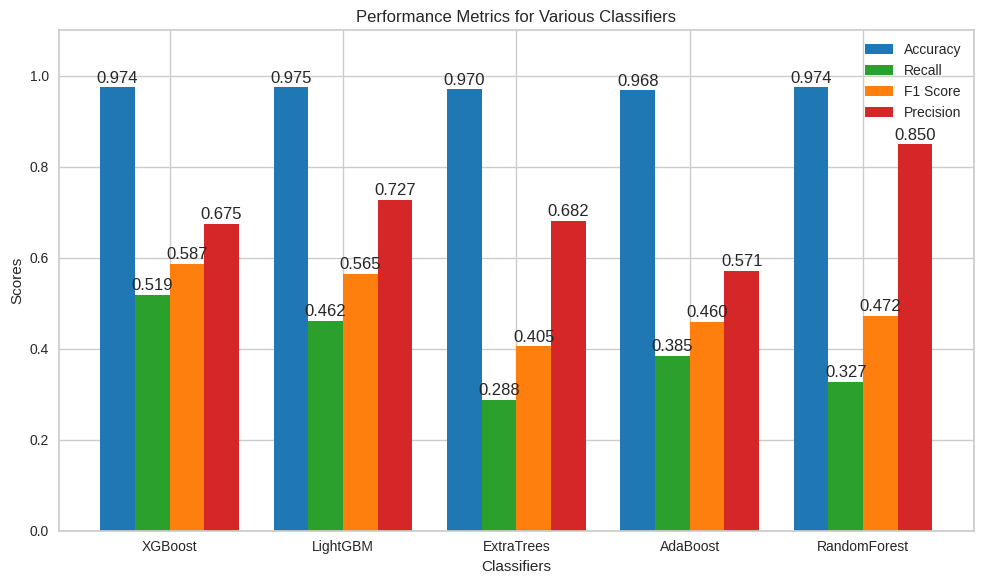

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ['XGBoost', 'LightGBM', 'ExtraTrees', 'AdaBoost', 'RandomForest']

# Metrics
accuracy = [0.9743589743589743, 0.975033738191633, 0.970310391363023, 0.9682860998650472, 0.9743589743589743]
recall = [0.5192307692307693, 0.46153846153846156, 0.28846153846153844, 0.38461538461538464, 0.3269230769230769]
f1_score = [0.5869565217391305, 0.5647058823529412, 0.40540540540540543, 0.45977011494252873, 0.4722222222222222]
precision = [0.675, 0.7272727272727273, 0.6818181818181818, 0.5714285714285714, 0.85]

# Bar width
bar_width = 0.2

# X-axis positions
x = np.arange(len(classifiers))

# Plotting each metric
plt.figure(figsize=(10, 6))

# Accuracy bars
plt.bar(x - 1.5 * bar_width, accuracy, width=bar_width, color='#1f77b4', label='Accuracy')
for i in range(len(classifiers)):
    plt.text(x[i] - 1.5 * bar_width, accuracy[i] + 0.01, f'{accuracy[i]:.3f}', ha='center')

# Recall bars
plt.bar(x - 0.5 * bar_width, recall, width=bar_width, color='#2ca02c', label='Recall')
for i in range(len(classifiers)):
    plt.text(x[i] - 0.5 * bar_width, recall[i] + 0.01, f'{recall[i]:.3f}', ha='center')

# F1 Score bars
plt.bar(x + 0.5 * bar_width, f1_score, width=bar_width, color='#ff7f0e', label='F1 Score')
for i in range(len(classifiers)):
    plt.text(x[i] + 0.5 * bar_width, f1_score[i] + 0.01, f'{f1_score[i]:.3f}', ha='center')

# Precision bars
plt.bar(x + 1.5 * bar_width, precision, width=bar_width, color='#d62728', label='Precision')
for i in range(len(classifiers)):
    plt.text(x[i] + 1.5 * bar_width, precision[i] + 0.01, f'{precision[i]:.3f}', ha='center')

# Adding labels and title
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Performance Metrics for Various Classifiers')
plt.xticks(x, classifiers)
plt.ylim(0, 1.1)
plt.legend()

# Display plot
plt.tight_layout()
plt.show()


#Accuracy of single Model graph

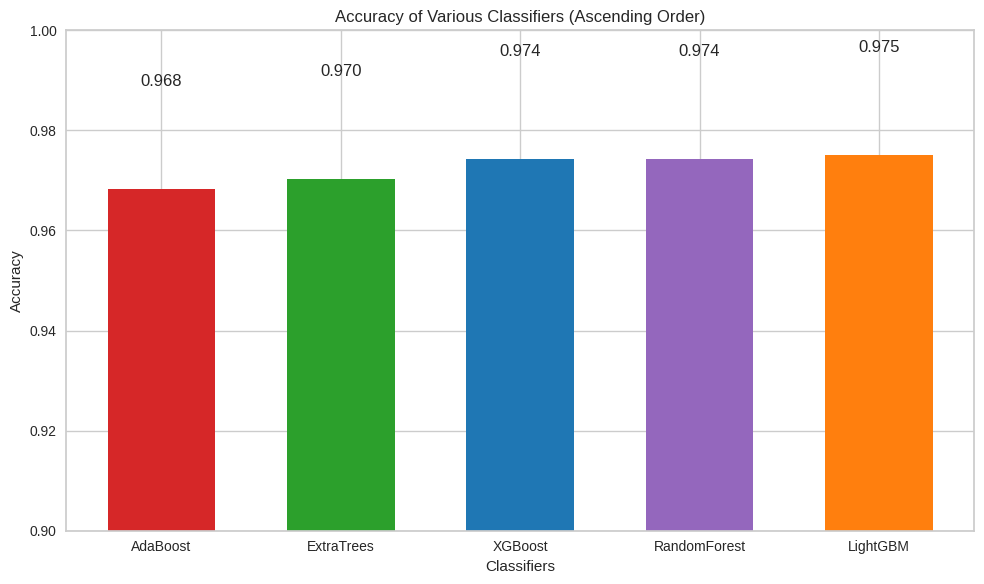

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original data
classifiers = ['XGBoost', 'LightGBM', 'ExtraTrees', 'AdaBoost', 'RandomForest']
accuracy = [0.9743589743589743, 0.975033738191633, 0.970310391363023, 0.9682860998650472, 0.9743589743589743]

# Sort by accuracy
sorted_indices = np.argsort(accuracy)
sorted_classifiers = np.array(classifiers)[sorted_indices]
sorted_accuracy = np.array(accuracy)[sorted_indices]

# Colors for each bar (sorted order)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
sorted_colors = np.array(colors)[sorted_indices]

# Bar width
bar_width = 0.6

# X-axis positions
x = np.arange(len(sorted_classifiers))

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(x, sorted_accuracy, width=bar_width, color=sorted_colors)

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Various Classifiers (Ascending Order)')
plt.xticks(x, sorted_classifiers)
plt.ylim(0.9, 1)

# Display plot
plt.tight_layout()
plt.show()


#Hybrid Model Performance on Random Forest model LightGBM model

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score # Import f1_score

# Initialize individual models
rf_model = RandomForestClassifier(random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)

# Create a VotingClassifier (hybrid model)
hybrid_model = VotingClassifier(estimators=[
    ('rf', rf_model), ('lgb', lgb_model)], voting='soft')  # 'soft' for weighted averaging

# Fit the hybrid model
hybrid_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = hybrid_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Use the imported f1_score function
precision = precision_score(y_test, y_pred)

# Print the results
print("Hybrid Model Performance on Random Forest model LightGBM model:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 227, number of negative: 5700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4714
[LightGBM] [Info] Number of data points in the train set: 5927, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038299 -> initscore=-3.223271
[LightGBM] [Info] Start training from score -3.223271
Hybrid Model Performance on Random Forest model LightGBM model:
Accuracy: 0.9777327935222672
Recall: 0.5
F1 Score: 0.611764705882353
Precision: 0.7878787878787878


#Hybrid Model Performance on XGBoost and LightGBM

In [ ]:
# Initialize individual models
xgb_model = xgb.XGBClassifier(random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)

# Create a VotingClassifier (hybrid model)
hybrid_model = VotingClassifier(estimators=[
    ('xgb', xgb_model), ('lgb', lgb_model)], voting='soft')  # 'soft' for weighted averaging

# Fit the hybrid model
hybrid_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = hybrid_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Use the imported f1_score function
precision = precision_score(y_test, y_pred)

# Print the results
print("Hybrid Model Performance on XGBoost and LightGBM:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 227, number of negative: 5700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4714
[LightGBM] [Info] Number of data points in the train set: 5927, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038299 -> initscore=-3.223271
[LightGBM] [Info] Start training from score -3.223271
Hybrid Model Performance on XGBoost and LightGBM:
Accuracy: 0.9770580296896086
Recall: 0.5192307692307693
F1 Score: 0.6136363636363636
Precision: 0.75


In [ ]:
# Initialize individual models
et_model = ExtraTreesClassifier(random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)

# Create a VotingClassifier (hybrid model)
hybrid_model = VotingClassifier(estimators=[
    ('et', et_model), ('lgb', lgb_model)], voting='soft')  # 'soft' for weighted averaging

# Fit the hybrid model
hybrid_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = hybrid_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Use the imported f1_score function
precision = precision_score(y_test, y_pred)

# Print the results
print("Hybrid Model Performance ExtraTree and LightGBM:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 227, number of negative: 5700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4714
[LightGBM] [Info] Number of data points in the train set: 5927, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038299 -> initscore=-3.223271
[LightGBM] [Info] Start training from score -3.223271
Hybrid Model Performance ExtraTree and LightGBM:
Accuracy: 0.975033738191633
Recall: 0.4230769230769231
F1 Score: 0.5432098765432098
Precision: 0.7586206896551724


#Hyperparameter Tuning  on RF and LGBM with 10 Number of parameter combinations

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Initialize individual models
rf_model = RandomForestClassifier(random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)

# Create a VotingClassifier (hybrid model)
hybrid_model = VotingClassifier(estimators=[
    ('rf', rf_model), ('lgb', lgb_model)], voting='soft')

# Define parameter grids for each model
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10]
}

param_grid_lgb = {
    'lgb__n_estimators': [50, 100, 200],
    'lgb__learning_rate': [0.01, 0.1, 0.2],
    'lgb__num_leaves': [31, 50, 100]
}

# Combine parameter grids
param_grid = {**param_grid_rf, **param_grid_lgb}

# Use RandomizedSearchCV for hyperparameter tuning

random_search = RandomizedSearchCV(
    estimator=hybrid_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter combinations to try
    scoring='accuracy',  # Or another suitable metric
    cv=5,  # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# Get the best estimator
best_hybrid_model = random_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_hybrid_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Best Hybrid Model Performance:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 227, number of negative: 5700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4714
[LightGBM] [Info] Number of data points in the train set: 5927, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038299 -> initscore=-3.223271
[LightGBM] [Info] Start training from score -3.223271
Best Hybrid Model Performance:
Accuracy: 0.9784075573549258
Recall: 0.5
F1 Score: 0.6190476190476191
Precision: 0.8125
Best Hyperparameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 2, 'rf__max_depth': None, 'lgb__num_leaves': 50, 'lgb__n_estimators': 50, 'lgb__learning_rate': 0.2}


#Hyperparameter Tuning  on RF and LGBM with 20 Number of parameter combinations

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Initialize individual models
rf_model = RandomForestClassifier(random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)

# Create a VotingClassifier (hybrid model)
hybrid_model = VotingClassifier(estimators=[
    ('rf', rf_model), ('lgb', lgb_model)], voting='soft')

# Define simplified parameter grids for each model
param_grid_rf = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10],
    'rf__min_samples_split': [2, 5]
}

param_grid_lgb = {
    'lgb__n_estimators': [50, 100],
    'lgb__learning_rate': [0.01, 0.1],
    'lgb__num_leaves': [31, 50]
}

# Combine parameter grids
param_grid = {**param_grid_rf, **param_grid_lgb}

# Use RandomizedSearchCV for hyperparameter tuning with fewer iterations
random_search = RandomizedSearchCV(
    estimator=hybrid_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,  # Reduced number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# Get the best estimator
best_hybrid_model = random_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_hybrid_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Best Hybrid Model Performance:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 227, number of negative: 5700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4714
[LightGBM] [Info] Number of data points in the train set: 5927, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038299 -> initscore=-3.223271
[LightGBM] [Info] Start training from score -3.223271
Best Hybrid Model Performance:
Accuracy: 0.979757085020243
Recall: 0.5576923076923077
F1 Score: 0.6590909090909091
Precision: 0.8055555555555556
Best Hyperparameters: {'rf__n_estimators': 50, 'rf__min_samples_split': 5, 'rf__max_depth': None, 'lgb__num_leaves': 50, 'lgb__n_estimators': 100, 'lgb__learning_rate': 0.1}


#Model Performance Comparison Table

In [ ]:
import pandas as pd

# Data for the models
data = {
    "Model": [
        "XGboost", "LightGBM", "Extra Trees Classifier", "Random Forest Classifier",
        "AdaBoost Classifier", "Hybrid (Random Forest + LightGBM)",
        "Hybrid (XGBoost + LightGBM)", "Hybrid (Extra Trees + LightGBM)"
    ],
    "Accuracy": [
        0.9743589743589743, 0.975033738191633, 0.970310391363023,
        0.9743589743589743, 0.9682860998650472, 0.9777327935222672,
        0.9770580296896086, 0.975033738191633
    ],
    "Recall": [
        0.5192307692307693, 0.46153846153846156, 0.28846153846153844,
        0.3269230769230769, 0.38461538461538464, 0.5,
        0.5192307692307693, 0.4230769230769231
    ],
    "F1 Score": [
        0.5869565217391305, 0.5647058823529412, 0.40540540540540543,
        0.4722222222222222, 0.45977011494252873, 0.611764705882353,
        0.6136363636363636, 0.5432098765432098
    ],
    "Precision": [
        0.675, 0.7272727272727273, 0.6818181818181818,
        0.85, 0.5714285714285714, 0.7878787878787878,
        0.75, 0.7586206896551724
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=df)

df


,Model,Accuracy,Recall,F1 Score,Precision
0,XGboost,0.974359,0.519231,0.586957,0.675000
1,LightGBM,0.975034,0.461538,0.564706,0.727273
2,Extra Trees Classifier,0.970310,0.288462,0.405405,0.681818
3,Random Forest Classifier,0.974359,0.326923,0.472222,0.850000
4,AdaBoost Classifier,0.968286,0.384615,0.459770,0.571429
5,Hybrid (Random Forest + LightGBM),0.977733,0.500000,0.611765,0.787879
6,Hybrid (XGBoost + LightGBM),0.977058,0.519231,0.613636,0.750000
7,Hybrid (Extra Trees + LightGBM),0.975034,0.423077,0.543210,0.758621


#Result with Hybride Model

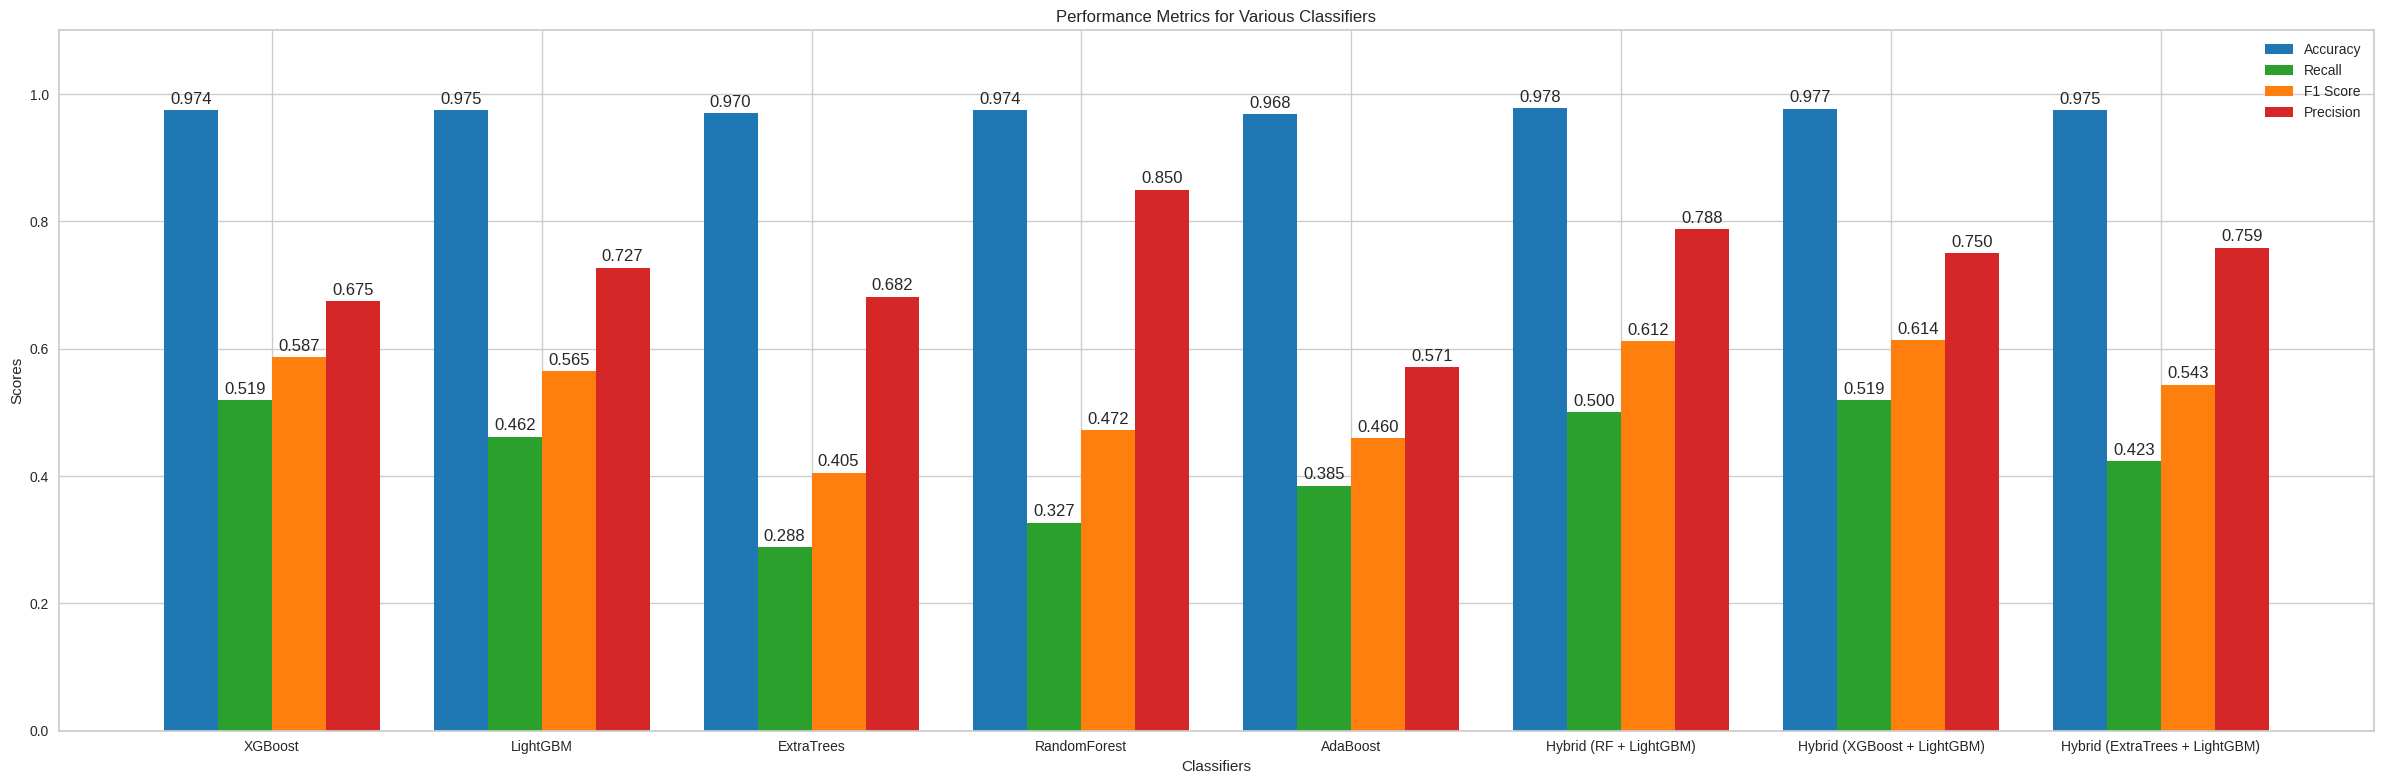

In [ ]:
# Classifier names
classifiers = [
    'XGBoost', 'LightGBM', 'ExtraTrees', 'RandomForest', 'AdaBoost',
    'Hybrid (RF + LightGBM)', 'Hybrid (XGBoost + LightGBM)', 'Hybrid (ExtraTrees + LightGBM)'
]

# Metrics
accuracy = [
    0.9743589743589743, 0.975033738191633, 0.970310391363023, 0.9743589743589743,
    0.9682860998650472, 0.9777327935222672, 0.9770580296896086, 0.975033738191633
]
recall = [
    0.5192307692307693, 0.46153846153846156, 0.28846153846153844, 0.3269230769230769,
    0.38461538461538464, 0.5, 0.5192307692307693, 0.4230769230769231
]
f1_score = [
    0.5869565217391305, 0.5647058823529412, 0.40540540540540543, 0.4722222222222222,
    0.45977011494252873, 0.611764705882353, 0.6136363636363636, 0.5432098765432098
]
precision = [
    0.675, 0.7272727272727273, 0.6818181818181818, 0.85,
    0.5714285714285714, 0.7878787878787878, 0.75, 0.7586206896551724
]

# Bar width
bar_width = 0.2

# X-axis positions
x = np.arange(len(classifiers))

# Plotting each metric
plt.figure(figsize=(24, 8))

# Accuracy bars
plt.bar(x - 1.5 * bar_width, accuracy, width=bar_width, color='#1f77b4', label='Accuracy')
for i in range(len(classifiers)):
    plt.text(x[i] - 1.5 * bar_width, accuracy[i] + 0.01, f'{accuracy[i]:.3f}', ha='center')

# Recall bars
plt.bar(x - 0.5 * bar_width, recall, width=bar_width, color='#2ca02c', label='Recall')
for i in range(len(classifiers)):
    plt.text(x[i] - 0.5 * bar_width, recall[i] + 0.01, f'{recall[i]:.3f}', ha='center')

# F1 Score bars
plt.bar(x + 0.5 * bar_width, f1_score, width=bar_width, color='#ff7f0e', label='F1 Score')
for i in range(len(classifiers)):
    plt.text(x[i] + 0.5 * bar_width, f1_score[i] + 0.01, f'{f1_score[i]:.3f}', ha='center')

# Precision bars
plt.bar(x + 1.5 * bar_width, precision, width=bar_width, color='#d62728', label='Precision')
for i in range(len(classifiers)):
    plt.text(x[i] + 1.5 * bar_width, precision[i] + 0.01, f'{precision[i]:.3f}', ha='center')

# Adding labels and title
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Performance Metrics for Various Classifiers')
plt.xticks(x, classifiers)
plt.ylim(0, 1.1)
plt.legend()

# Display plot
plt.tight_layout()
plt.show()


#All The accuracy Of Classification

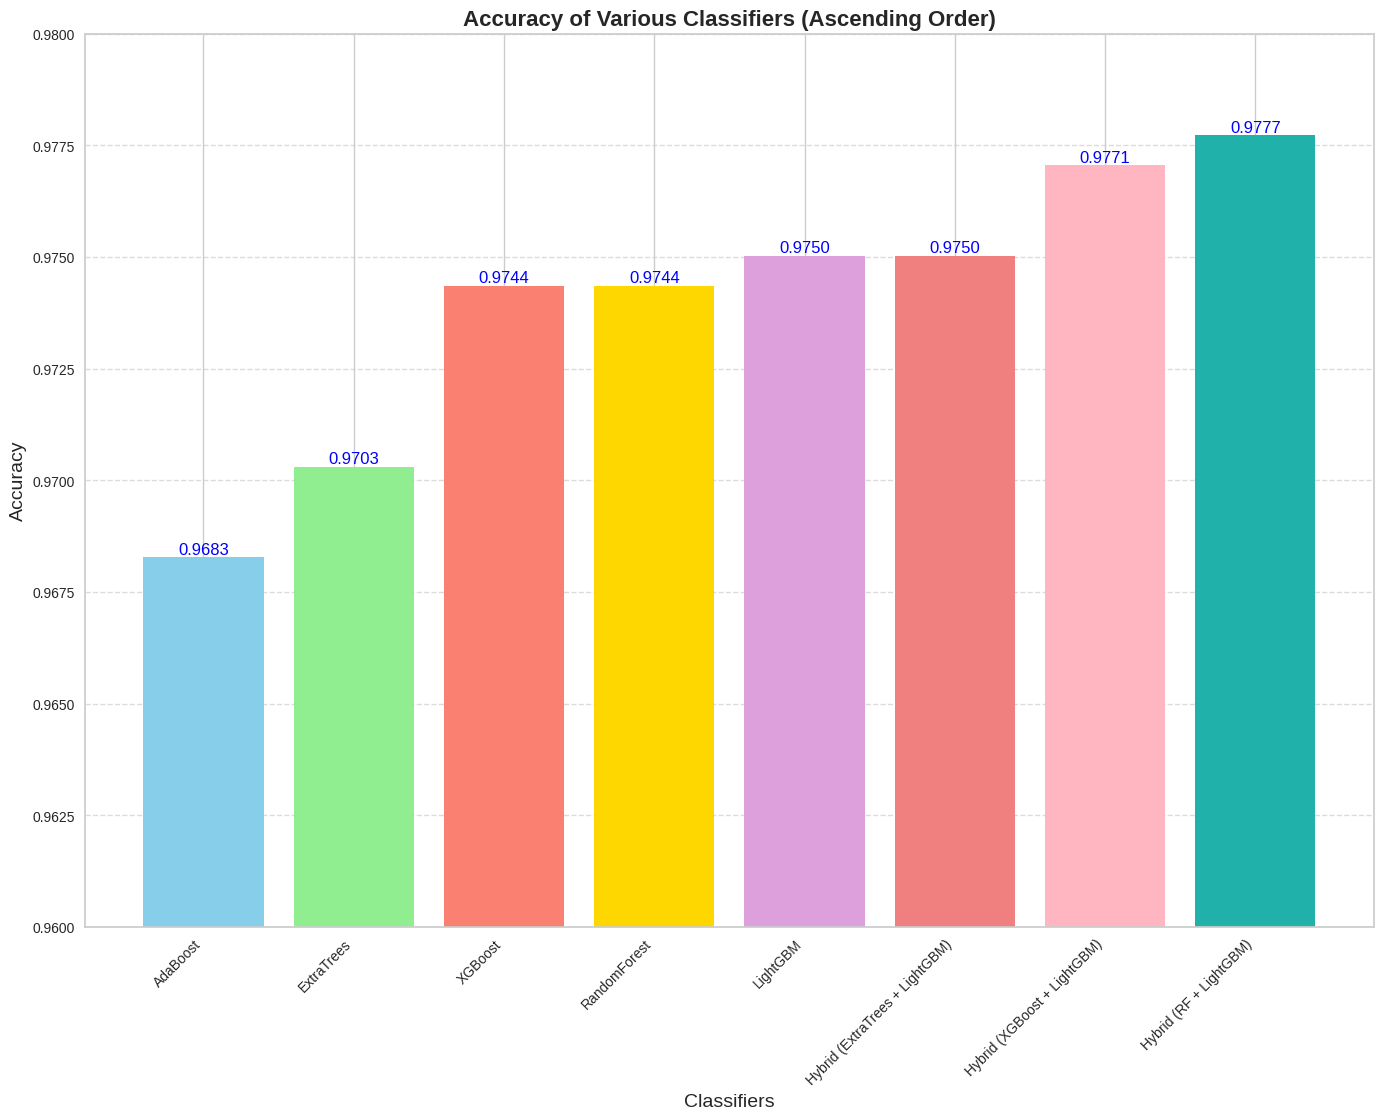

In [ ]:
import pandas as pd

# Data
accuracy = [
    0.9743589743589743, 0.975033738191633, 0.970310391363023, 0.9743589743589743,
    0.9682860998650472, 0.9777327935222672, 0.9770580296896086, 0.975033738191633
]
classifiers = [
    'XGBoost', 'LightGBM', 'ExtraTrees', 'RandomForest', 'AdaBoost',
    'Hybrid (RF + LightGBM)', 'Hybrid (XGBoost + LightGBM)', 'Hybrid (ExtraTrees + LightGBM)'
]

# Create DataFrame and sort by accuracy
df = pd.DataFrame({'Classifiers': classifiers, 'Accuracy': accuracy})
df = df.sort_values(by='Accuracy')

# Create plot with accuracy on the y-axis and classifiers on the x-axis, with colorful bars
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'plum', 'lightcoral', 'lightpink', 'lightseagreen']

plt.figure(figsize=(14, 10))
bars = plt.bar(df['Classifiers'], df['Accuracy'], color=colors)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Classifiers', fontsize=14)
plt.title('Accuracy of Various Classifiers (Ascending Order)', fontsize=16, fontweight='bold')
plt.ylim(0.96, 0.98)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.4f}',
             va='bottom', ha='center', fontsize=12, color='blue')

# Beautify the plot
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()
